# Hypothesis Testing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [8]:
ibm_df = pd.read_csv('../data/IBM_2013-09-01_2013-11-11_1d.csv', index_col=0, parse_dates=True)

returns_sample = np.log(ibm_df['Close'].div(ibm_df['Close'].shift(1)))

ibm_df.shape

(49, 7)

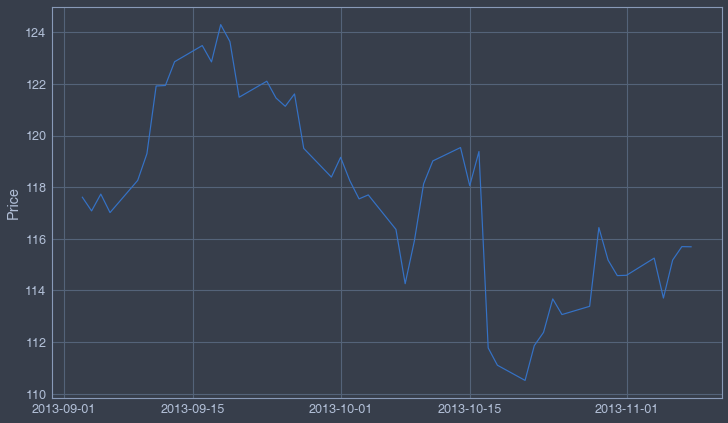

In [7]:
plt.plot(ibm_df['Close'].index, ibm_df['Close'].values)
plt.ylabel('Price');

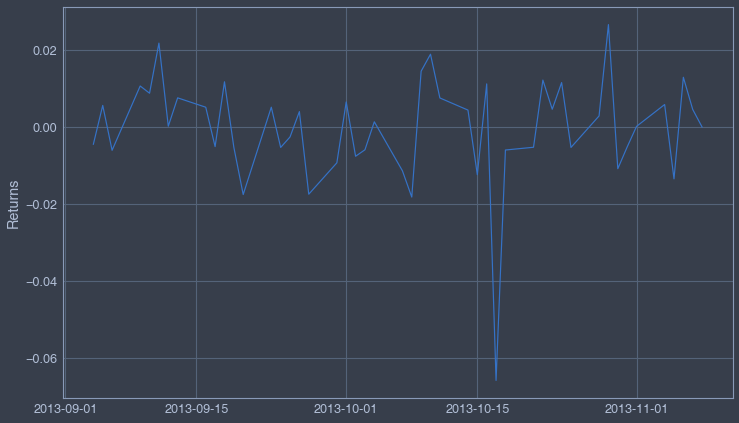

In [9]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

In [14]:
n = len(returns_sample)

test_statistic = ((returns_sample.mean() - 0) / (returns_sample.std()/np.sqrt(n)))
p_val = t.cdf(test_statistic, n - 1)

print(f't test statistic: {test_statistic}\np-value is: {p_val}')

t test statistic: -0.17061092833002253
p-value is: 0.4326234199672725


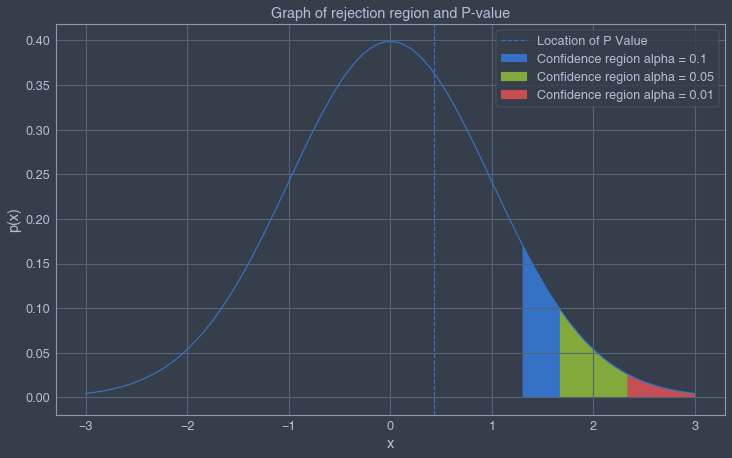

In [15]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.282, label = 'Confidence region alpha = 0.1')
ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region alpha = 0.05', color = 'g')
ax.fill_between(x, 0, y, where = x > 2.326, label = 'Confidence region alpha = 0.01', color = 'r')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();